# Week 4 handin

01 Assignment
http://127.0.0.1:8888/notebooks/04-Exercise.ipynb

02 Status
Finished exercise 1

03 Solution

In [8]:
import numpy as np
filename = '../data/befkbhalderstatkode.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [6]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

[['51937' 'Indre By']
 ['75113' 'Østerbro']
 ['78802' 'Nørrebro']
 ['61623' 'Vesterbro/Kgs. Enghave']
 ['51727' 'Valby']
 ['39537' 'Vanløse']
 ['43908' 'Brønshøj-Husum']
 ['53604' 'Bispebjerg']
 ['55205' 'Amager Øst']
 ['64967' 'Amager Vest']
 ['3872' 'Udenfor']]
{'3872': 'Udenfor', '39537': 'Vanløse', '43908': 'Brønshøj-Husum', '51727': 'Valby', '51937': 'Indre By', '53604': 'Bispebjerg', '55205': 'Amager Øst', '61623': 'Vesterbro/Kgs. Enghave', '64967': 'Amager Vest', '75113': 'Østerbro', '78802': 'Nørrebro'}
{'3872': 'Udenfor', '39537': 'Vanløse', '43908': 'Brønshøj-Husum', '51727': 'Valby', '51937': 'Indre By', '53604': 'Bispebjerg', '55205': 'Amager Øst', '61623': 'Vesterbro/Kgs. Enghave', '64967': 'Amager Vest', '75113': 'Østerbro', '78802': 'Nørrebro'}


<BarContainer object of 11 artists>

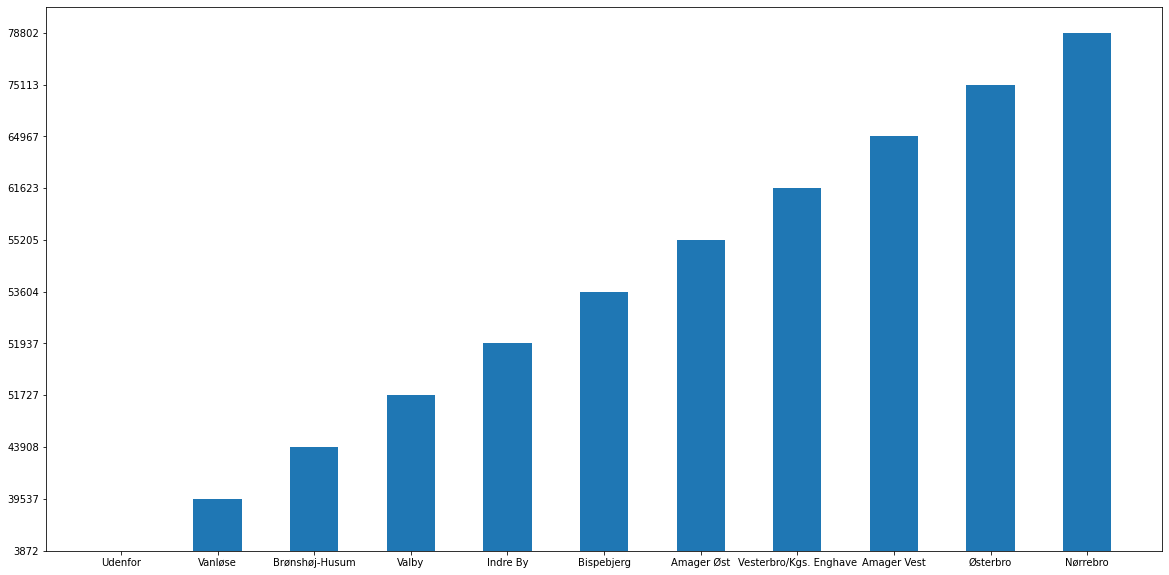

In [36]:
def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = data[mask & (data[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

tyvefemten_mask = (data[:,0] == 2015)
tyvefemten = np.array([(number_of_people_per_neighbourhood(n, tyvefemten_mask),neighb[n]) for n in neighb])
print(tyvefemten)

sorted_tyvefemten_tuple = sorted(tyvefemten, key=lambda x: x[0])
sorted_tyvefemten = {k:v for k,v in sorted_tyvefemten_tuple}
print(sorted_tyvefemten)



print(sorted_tyvefemten)

import matplotlib.pyplot as plt
plt.figure(figsize =(20,10))
plt.bar(sorted_tyvefemten.values(),sorted_tyvefemten.keys(),width=0.5, align='center')

In [53]:
sixtyfive_mask = ((data[:,0] == 2015) & (data[:,2] > 65))

country1 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5101)
country2 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5104)
country3 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5105)
country4 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5106)
country5 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5110)
country6 = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == 5120)
nordic_sixtyfive_mask = country1 + country2 + country3 + country4 + country5 + country6

sixtyfives = np.sum(data[sixtyfive_mask][:,4])
sixtyfives_nordic = np.sum(data[nordic_sixtyfive_mask][:,4])
print(sixtyfives)
print(sixtyfives_nordic)

55750
610


Rød = Vesterbro
Blå = Østerbro


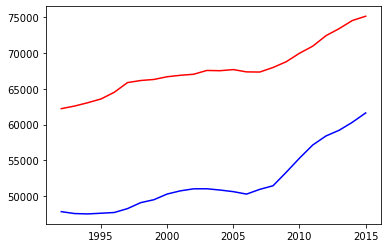

In [75]:
år = np.arange(1992,2015+1)
østerbro_people = data[:,1] == 4 
vesterbro_people = data[:,1] == 2

østerbro = dict((n, np.sum(data[(data[:,0] == n) & (østerbro_people)][:,4])) for n in år)
vesterbro = dict((n, np.sum(data[(data[:,0] == n) & (vesterbro_people)][:,4])) for n in år)
      
p1 = plt.plot(list(østerbro.keys()), list(østerbro.values()), color = 'blue') 
p2 = plt.plot(list(vesterbro.keys()), list(vesterbro.values()), color = 'red') 
print("Rød = Vesterbro")
print("Blå = Østerbro")